In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
# Load dataset

athletes = pd.read_csv('/athlete_events.csv')
regions = pd.read_csv('/noc_regions.csv')

In [ ]:
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180,80.0,China,CHN,1992 Summer,1992.0,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170,60.0,China,CHN,2012 Summer,2012.0,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920.0,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900.0,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185,82.0,Netherlands,NED,1988 Winter,1988.0,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [ ]:
# Join the dataframes

athletes_df = athletes.merge(regions, how='left', on='NOC')
athletes_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180,80.0,China,CHN,1992 Summer,1992.0,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170,60.0,China,CHN,2012 Summer,2012.0,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920.0,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900.0,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185,82.0,Netherlands,NED,1988 Winter,1988.0,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [ ]:
#Total number of rows and columns
athletes_df.shape

(41318, 17)

In [ ]:
#Column names consistent

athletes_df.rename(columns={'region':'Region','notes':'Notes'}, inplace=True)

In [ ]:
athletes_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180,80.0,China,CHN,1992 Summer,1992.0,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170,60.0,China,CHN,2012 Summer,2012.0,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920.0,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900.0,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185,82.0,Netherlands,NED,1988 Winter,1988.0,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [ ]:
athletes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41318 entries, 0 to 41317
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      41318 non-null  int64  
 1   Name    41318 non-null  object 
 2   Sex     41318 non-null  object 
 3   Age     39816 non-null  float64
 4   Height  31987 non-null  object 
 5   Weight  31515 non-null  float64
 6   Team    41317 non-null  object 
 7   NOC     41317 non-null  object 
 8   Games   41317 non-null  object 
 9   Year    41317 non-null  float64
 10  Season  41317 non-null  object 
 11  City    41317 non-null  object 
 12  Sport   41317 non-null  object 
 13  Event   41317 non-null  object 
 14  Medal   5598 non-null   object 
 15  Region  41273 non-null  object 
 16  Notes   772 non-null    object 
dtypes: float64(3), int64(1), object(13)
memory usage: 5.7+ MB


In [ ]:
#Statistical information

athletes_df.describe()

,ID,Age,Weight,Year
count,41318.000000,39816.000000,31515.000000,41317.000000
mean,10813.488649,25.505651,70.785023,1978.645691
std,6048.087706,6.333934,14.272832,29.590765
min,1.000000,12.000000,25.000000,1896.000000
25%,5657.250000,21.000000,61.000000,1960.000000
50%,10906.000000,24.000000,70.000000,1988.000000
75%,15957.000000,28.000000,79.000000,2002.000000
max,21310.000000,84.000000,214.000000,2016.000000


In [ ]:
#Check null values

nan_values = athletes_df.isna()
nan_columns = nan_values.any()
nan_columns

# True = missing values

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team       True
NOC        True
Games      True
Year       True
Season     True
City       True
Sport      True
Event      True
Medal      True
Region     True
Notes      True
dtype: bool

In [ ]:
#Total number of null values

athletes_df.isnull().sum()

ID            0
Name          0
Sex           0
Age        1502
Height     9331
Weight     9803
Team          1
NOC           1
Games         1
Year          1
Season        1
City          1
Sport         1
Event         1
Medal     35720
Region       45
Notes     40546
dtype: int64

In [ ]:
#Total number of null values

athletes_df.isnull().sum()

ID            0
Name          0
Sex           0
Age        1502
Height     9331
Weight     9803
Team          1
NOC           1
Games         1
Year          1
Season        1
City          1
Sport         1
Event         1
Medal     35720
Region       45
Notes     40546
dtype: int64

In [ ]:
#China details

athletes_df.query('Team == "China"').head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180,80.0,China,CHN,1992 Summer,1992.0,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170,60.0,China,CHN,2012 Summer,2012.0,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
1072,602,Abudoureheman,M,22.0,182,75.0,China,CHN,2000 Summer,2000.0,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN
2611,1463,Ai Linuer,M,25.0,160,62.0,China,CHN,2004 Summer,2004.0,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN
2612,1464,Ai Yanhan,F,14.0,168,54.0,China,CHN,2016 Summer,2016.0,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN


In [ ]:
# Top countries participating

top10_countries = athletes_df.Team.value_counts().sort_values(ascending=False).head(10)
top10_countries

United States    2654
France           2485
Italy            2353
Great Britain    1826
Canada           1459
Sweden           1347
Australia        1254
Germany          1198
Spain            1059
Switzerland       970
Name: Team, dtype: int64

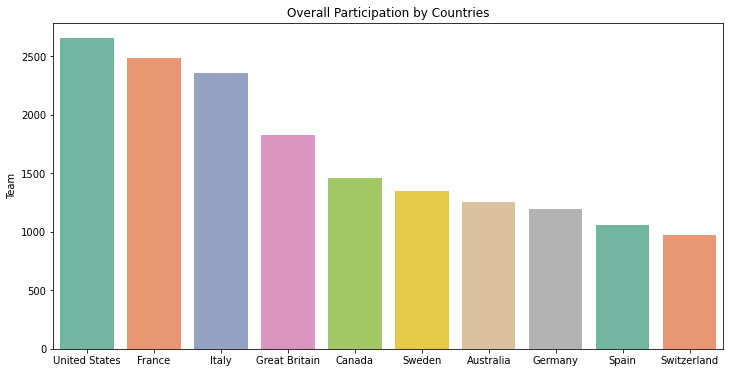

In [ ]:
#Plot for the top 10 countries

plt.figure(figsize=(12,6))
#plt.xticks(rotation=20)
plt.title('Overall Participation by Countries')
sns.barplot(x=top10_countries.index, y=top10_countries, palette='Set2')

(array([0.000e+00, 3.700e+01, 4.500e+02, 1.380e+03, 3.051e+03, 5.413e+03,
        6.484e+03, 6.360e+03, 5.027e+03, 3.934e+03, 2.500e+03, 1.664e+03,
        1.021e+03, 6.530e+02, 4.650e+02, 3.710e+02, 2.520e+02, 2.080e+02,
        1.360e+02, 9.700e+01, 8.300e+01, 6.200e+01, 2.500e+01, 3.200e+01,
        1.900e+01, 2.000e+01, 1.100e+01, 1.700e+01, 2.000e+00, 2.100e+01,
        1.400e+01, 4.000e+00, 2.000e+00, 0.000e+00]),
 array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42,
        44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76,
        78]),
 <a list of 34 Patch objects>)

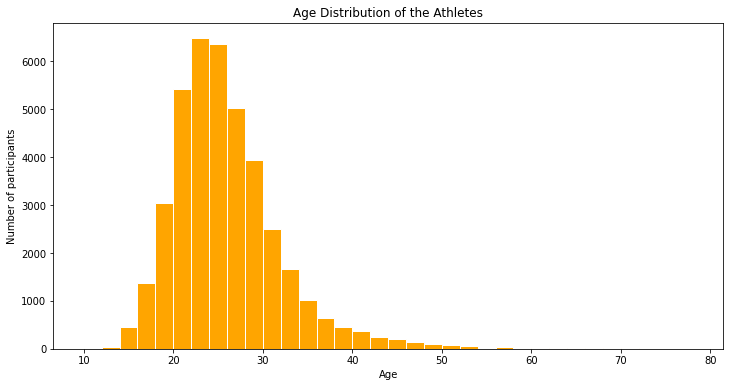

In [ ]:
#Age Distribution of the participants

plt.figure(figsize=(12,6))
plt.title('Age Distribution of the Athletes')
plt.xlabel('Age')
plt.ylabel('Number of participants')

plt.hist(athletes_df.Age, bins=np.arange(10,80,2),color='orange',edgecolor='white')

In [ ]:
#Winter Sports

winter_sports = athletes_df[athletes_df.Season=='Winter'].Sport.unique()
winter_sports

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

In [ ]:
#Summer Sports

summer_sports = athletes_df[athletes_df.Season=='Summer'].Sport.unique()
summer_sports

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque'], dtype=object)

In [ ]:
#Male and Female participants

_counts = athletes_df.Sex.value_counts()
gender_counts

M    30706
F    10612
Name: Sex, dtype: int64

([<matplotlib.patches.Wedge at 0x7fd9c6c45bd0>,
 [Text(0.2618144922440217, -1.068388118452749, 'M'),
  Text(-0.2618145922737352, 1.0683880939399024, 'F')],
 [Text(0.14280790486037545, -0.5827571555196812, '74.3%'),
  Text(-0.14280795942203736, 0.5827571421490376, '25.7%')])

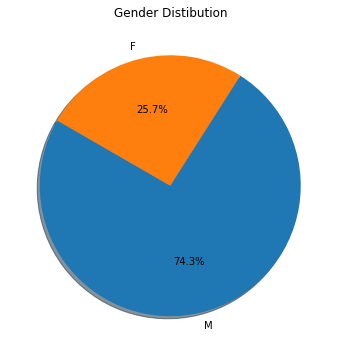

In [ ]:
#Pie plot comparision

plt.figure(figsize=(12,6))
plt.title('Gender Distibution')

plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=150, shadow=True)

In [ ]:
#Total medals

athletes_df.Medal.value_counts()

Gold      1908
Silver    1876
Bronze    1814
Name: Medal, dtype: int64

In [ ]:
#Total number of female athletes in each olympics

female_participants = athletes_df[(athletes_df.Sex=='F') & (athletes_df.Season=='Summer')][['Sex','Year']]
female_participants = female_participants.groupby('Year').count().reset_index()
female_participants.head()
female_participants.tail() #recent list

,Year,Sex
21,2000.0,789
22,2004.0,765
23,2008.0,818
24,2012.0,876
25,2016.0,986


In [ ]:
womenOlympics = athletes_df[(athletes_df.Sex=='F') & (athletes_df.Season=='Summer')]
womenOlympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168,NaN,Netherlands,NED,1932 Summer,1932.0,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN
27,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168,NaN,Netherlands,NED,1932 Summer,1932.0,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,NaN,Netherlands,NaN
32,13,Minna Maarit Aalto,F,30.0,159,55.5,Finland,FIN,1996 Summer,1996.0,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,NaN,Finland,NaN
33,13,Minna Maarit Aalto,F,34.0,159,55.5,Finland,FIN,2000 Summer,2000.0,Summer,Sydney,Sailing,Sailing Women's Windsurfer,NaN,Finland,NaN
79,21,Ragnhild Margrethe Aamodt,F,27.0,163,NaN,Norway,NOR,2008 Summer,2008.0,Summer,Beijing,Handball,Handball Women's Handball,Gold,Norway,NaN


Text(0.5, 1.0, 'Women Participation')

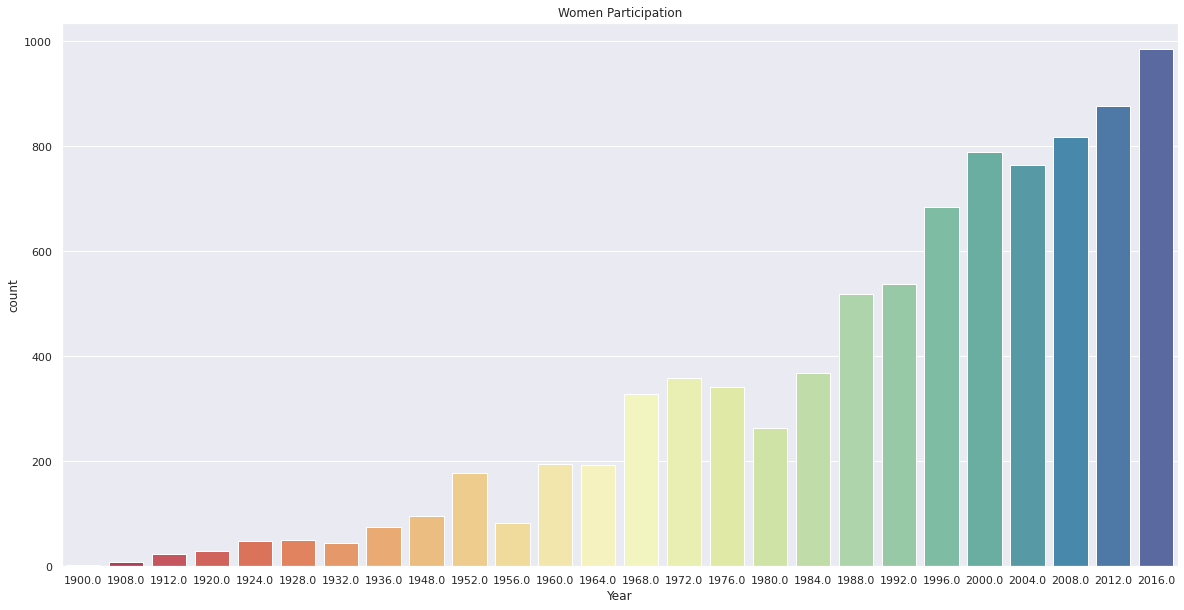

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(20,10))
sns.countplot(x='Year', data=womenOlympics, palette="Spectral")
plt.title('Women Participation')

Text(0.5, 1.0, 'Plot of Female Athletes over time')

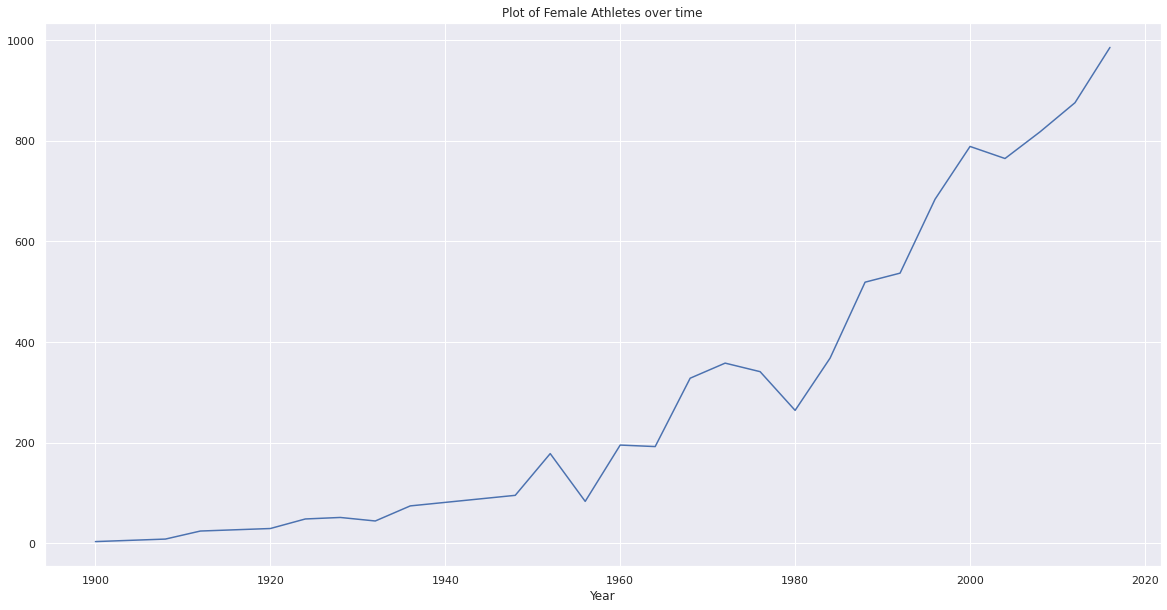

In [ ]:
#Line Chart

part = womenOlympics.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20,10))
part.loc[:,'F'].plot()
plt.title('Plot of Female Athletes over time')

In [ ]:
#Gold medal athletes

goldMedals = athletes_df[(athletes_df.Medal=='Gold')]
goldMedals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900.0,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175,64.0,Finland,FIN,1948 Summer,1948.0,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175,64.0,Finland,FIN,1948 Summer,1948.0,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175,64.0,Finland,FIN,1948 Summer,1948.0,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176,85.0,Norway,NOR,1992 Winter,1992.0,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


In [ ]:
#take only the values that are different from NaN.

goldMedals = goldMedals[np.isfinite(goldMedals['Age'])]

In [ ]:
#Gold beyond 50

goldMedals['ID'][goldMedals['Age']>50].count()

8

In [ ]:
sporting_event = goldMedals['Sport'][goldMedals['Age']>50]
sporting_event

5078     Equestrianism
7961           Sailing
13394    Equestrianism
13396    Equestrianism
24897    Equestrianism
30323         Alpinism
38675    Equestrianism
41288          Sailing
Name: Sport, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Gold Medals for Athletes over 50 year')

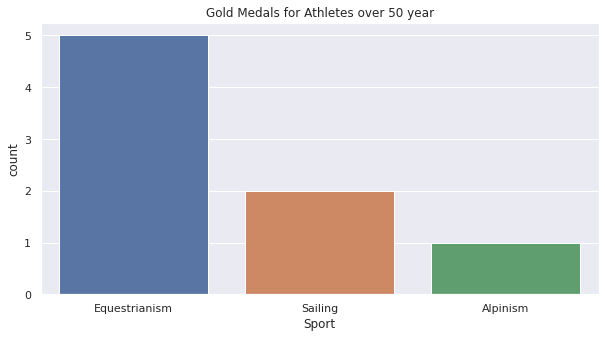

In [ ]:
#plot for sporting_event

plt.figure(figsize=(10,5))
plt.tight_layout()
sns.countplot(sporting_event)
plt.title('Gold Medals for Athletes over 50 year')

In [ ]:
#Gold medals from each country

goldMedals.Region.value_counts().reset_index(name='Medal').head(5)

,index,Medal
0,USA,395
1,Russia,230
2,Germany,142
3,Italy,128
4,UK,108


Text(0.5, 1.0, 'Gold Medal per Country')

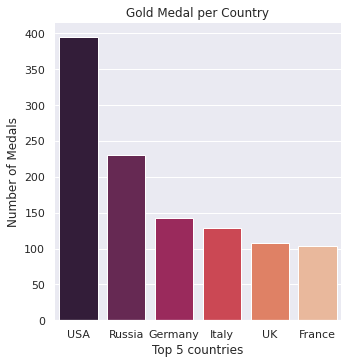

In [ ]:
totalGoldMedals = goldMedals.Region.value_counts().reset_index(name='Medal').head(6)
g = sns.catplot(x="index",y="Medal",data=totalGoldMedals,
               height=5, kind="bar", palette="rocket")
g.despine(left=True)
g.set_xlabels("Top 5 countries")
g.set_ylabels("Number of Medals")
plt.title('Gold Medal per Country')

In [ ]:
#Rio Olympics

max_year = athletes_df.Year.max()
print(max_year)

2016.0


In [ ]:
team_names = athletes_df[(athletes_df.Year==max_year) & (athletes_df.Medal=='Gold')].Team

In [ ]:
team_names.value_counts().head(10)

United States    20
Russia            8
Great Britain     8
Australia         7
Germany           6
Jamaica           6
China             5
France            4
Italy             4
Brazil            4
Name: Team, dtype: int64

Text(0.5, 0, 'Countrywise Medals for the year 2016')

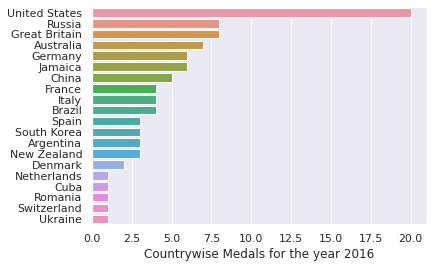

In [ ]:
#Horizontal bar plot

sns.barplot(x=team_names.value_counts().head(20), y=team_names.value_counts().head(20).index)

plt.ylabel(None)
plt.xlabel('Countrywise Medals for the year 2016')

In [ ]:
not_null_medals = athletes_df[(athletes_df['Height'].notnull()) & (athletes_df['Weight'].notnull())]

Text(0.5, 1.0, 'Height vs Weight of Olympic Medalists')

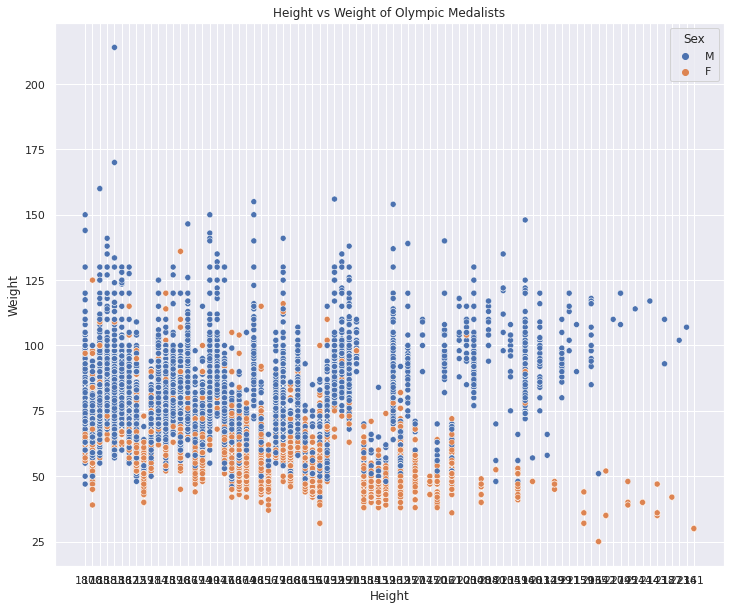

In [ ]:
#Scatter plot

plt.figure(figsize = (12,10))
axis = sns.scatterplot(x="Height",y="Weight", data=not_null_medals, hue="Sex")
plt.title('Height vs Weight of Olympic Medalists')